In [3]:
import pandas as pd
%matplotlib inline
import chardet
import pandas
from pandas import plotting
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import datasets
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)
pandas.set_option('display.precision', 3)

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


C:\Users\migue\AppData\Local\Temp\ipykernel_14816\1668778658.py:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


### Position of the player near or away from the basket

In [4]:
#Figure out what the correct encoding should be and read in the file to a DataFrame
with open("nba_data.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000000))

# check what the character encoding might be
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


### Reading dataset

In [5]:
data = pandas.read_csv('nba_data.csv', sep=';', encoding='Windows-1252')
data

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,6.1,0.468,0.486,1.1,1.8,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,5.0,0.548,0.547,1.4,2.6,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,12.9,0.562,0.557,4.6,6.1,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,2.6,0.560,0.424,0.6,1.0,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1,8.8,0.578,0.566,1.9,2.2,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,0.465,0.7,1.7,0.395,1.9,3.9,0.495,0.524,0.5,1.0,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.460,3.1,8.0,0.382,6.3,12.3,0.512,0.536,6.6,7.3,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,0.526,0.0,0.2,0.091,2.3,4.2,0.547,0.528,0.7,1.1,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,0.567,0.0,0.1,0.000,1.9,3.2,0.593,0.567,1.4,1.8,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


In [6]:
data.describe(include='all').T.style.background_gradient(cmap = "")

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rk,812.000000,nan,nan,nan,304.501232,172.637333,1.000000,158.750000,300.500000,459.000000,605.000000
Player,812,605,Greg Monroe,5,nan,nan,nan,nan,nan,nan,nan
Pos,812,11,SG,199,nan,nan,nan,nan,nan,nan,nan
Age,812.000000,nan,nan,nan,26.051724,4.059640,19.000000,23.000000,25.000000,29.000000,41.000000
Tm,812,31,TOT,97,nan,nan,nan,nan,nan,nan,nan
G,812.000000,nan,nan,nan,36.704433,25.899099,1.000000,12.000000,36.500000,61.000000,82.000000
GS,812.000000,nan,nan,nan,16.672414,23.817195,0.000000,0.000000,4.000000,25.000000,82.000000
MP,812.000000,nan,nan,nan,18.265394,9.648292,1.000000,10.500000,17.500000,25.725000,43.500000
FG,812.000000,nan,nan,nan,2.869951,2.223988,0.000000,1.200000,2.400000,3.900000,11.400000
FGA,812.000000,nan,nan,nan,6.386576,4.651121,0.000000,3.000000,5.150000,8.725000,21.800000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      812 non-null    int64  
 1   Player  812 non-null    object 
 2   Pos     812 non-null    object 
 3   Age     812 non-null    int64  
 4   Tm      812 non-null    object 
 5   G       812 non-null    int64  
 6   GS      812 non-null    int64  
 7   MP      812 non-null    float64
 8   FG      812 non-null    float64
 9   FGA     812 non-null    float64
 10  FG%     812 non-null    float64
 11  3P      812 non-null    float64
 12  3PA     812 non-null    float64
 13  3P%     812 non-null    float64
 14  2P      812 non-null    float64
 15  2PA     812 non-null    float64
 16  2P%     812 non-null    float64
 17  eFG%    812 non-null    float64
 18  FT      812 non-null    float64
 19  FTA     812 non-null    float64
 20  FT%     812 non-null    float64
 21  ORB     812 non-null    float64
 22  DR

### Missing data

In [8]:
data.isnull().any()

Rk        False
Player    False
Pos       False
Age       False
Tm        False
G         False
GS        False
MP        False
FG        False
FGA       False
FG%       False
3P        False
3PA       False
3P%       False
2P        False
2PA       False
2P%       False
eFG%      False
FT        False
FTA       False
FT%       False
ORB       False
DRB       False
TRB       False
AST       False
STL       False
BLK       False
TOV       False
PF        False
PTS       False
dtype: bool

In [9]:
data[data.Pos.isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [10]:
#In case having missing data, replace it property values
#data.fillna(data.mean())


### Correlation

In [11]:
#Correlation between numerical variables
corr = data.drop(columns=['Pos','Player', 'Tm'])

In [12]:
corr.corr().T.style.background_gradient(cmap = "Oranges")

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,1.000000,-0.037216,-0.066503,-0.086550,-0.050971,-0.057393,-0.054080,-0.001554,-0.052654,-0.052840,0.016625,-0.045805,-0.042180,-0.003819,0.001523,-0.044115,-0.043843,-0.017262,-0.030168,-0.079571,-0.070434,0.006615,-0.015441,-0.017137,-0.020534,0.000567,-0.057467
Age,-0.037216,1.000000,0.042212,0.052232,0.145388,0.087947,0.085564,0.059665,0.121144,0.104885,0.084448,0.053645,0.052922,0.051634,0.083222,0.070301,0.052197,0.075038,0.014226,0.124140,0.099501,0.171731,0.072693,0.038176,0.096063,0.127838,0.094685
G,-0.066503,0.042212,1.000000,0.680436,0.620290,0.563977,0.542432,0.311718,0.475981,0.457740,0.372137,0.484188,0.473385,0.285804,0.361020,0.405123,0.406731,0.468275,0.293125,0.517411,0.487806,0.387040,0.424368,0.336577,0.424739,0.470319,0.559330
GS,-0.086550,0.052232,0.680436,1.000000,0.751435,0.736394,0.713715,0.226771,0.530903,0.524531,0.226564,0.674423,0.676920,0.185241,0.239448,0.598500,0.601263,0.288935,0.354654,0.656365,0.612579,0.563921,0.521898,0.408970,0.617675,0.538844,0.732292
MP,-0.050971,0.145388,0.620290,0.751435,1.000000,0.886895,0.898603,0.299632,0.720450,0.732635,0.417982,0.773570,0.803061,0.256953,0.360893,0.696602,0.692933,0.496879,0.357061,0.756131,0.688470,0.728131,0.717810,0.447035,0.771405,0.743587,0.887411
FG,-0.057393,0.087947,0.563977,0.736394,0.886895,1.000000,0.970853,0.355639,0.679117,0.680076,0.352440,0.936068,0.944519,0.288871,0.370473,0.820781,0.820764,0.425511,0.383116,0.764754,0.703036,0.707715,0.617590,0.447414,0.811092,0.651883,0.989932
FGA,-0.054080,0.085564,0.542432,0.713715,0.898603,0.970853,1.000000,0.211332,0.764839,0.794470,0.367820,0.858461,0.907912,0.176087,0.255470,0.798048,0.783724,0.437638,0.257649,0.697697,0.612265,0.744193,0.637838,0.358791,0.824847,0.616042,0.975918
FG%,-0.001554,0.059665,0.311718,0.226771,0.299632,0.355639,0.211332,1.000000,0.053493,-0.018902,0.221204,0.423169,0.320742,0.849532,0.953627,0.230984,0.265083,0.260330,0.436072,0.372291,0.421290,0.109928,0.171141,0.387849,0.199539,0.395070,0.313305
3P,-0.052654,0.121144,0.475981,0.530903,0.720450,0.679117,0.764839,0.053493,1.000000,0.969827,0.550784,0.378097,0.444392,0.064877,0.242413,0.478165,0.428949,0.436182,-0.115142,0.359467,0.237293,0.539793,0.506564,0.092254,0.540044,0.381334,0.729547
3PA,-0.052840,0.104885,0.457740,0.524531,0.732635,0.680076,0.794470,-0.018902,0.969827,1.000000,0.470174,0.393432,0.466905,0.045527,0.155397,0.489752,0.440304,0.415277,-0.127942,0.369933,0.241032,0.564140,0.518342,0.087548,0.572415,0.386590,0.728704


In [13]:
def get_redundant_pairs(corr):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = corr.columns
    for i in range(0, corr.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(corr, n):
    au_corr = corr.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(corr)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(corr, 9))

Top Absolute Correlations
FG   PTS     0.990
FT   FTA     0.984
2P   2PA     0.979
FGA  PTS     0.976
DRB  TRB     0.972
FG   FGA     0.971
3P   3PA     0.970
FG%  eFG%    0.954
FG   2PA     0.945
dtype: float64


### Preprocessing

In [14]:
data.describe(include=object)

,Player,Pos,Tm
count,812,812,812
unique,605,11,31
top,Greg Monroe,SG,TOT
freq,5,199,97


In [15]:
data.groupby('Pos').size()

Pos
C        130
C-PF       2
PF       152
PF-SF      1
PG       155
PG-SG      1
SF       158
SF-SG      5
SG       199
SG-PG      4
SG-SF      5
dtype: int64

<Axes: xlabel='Pos'>

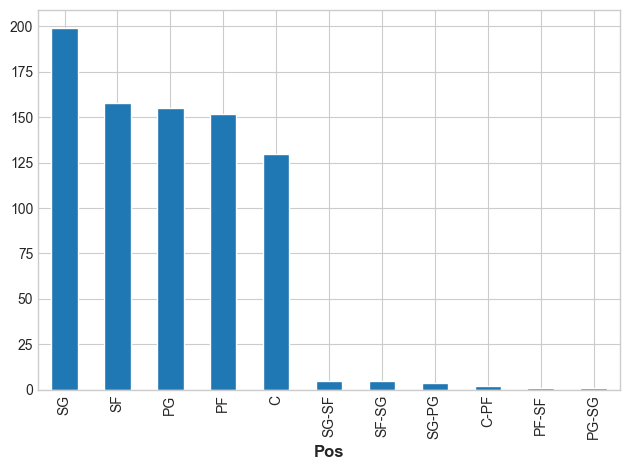

In [16]:
# Histogram for Positions
data.Pos.value_counts().plot(kind='bar')

In [17]:
print("Orignal distribution:")
print(f"    'Position 1' == PG -> {round(len(data.loc[data['Pos'] == 'PG']) * 100 / len(data), 2)}%")
print(f"    'Position 2' == SG -> {round(len(data.loc[data['Pos'] == 'SG']) * 100 / len(data), 2)}%")
print(f"    'Position 3' == SF -> {round(len(data.loc[data['Pos'] == 'SF']) * 100 / len(data), 2)}%")
print(f"    'Position 4' == PF -> {round(len(data.loc[data['Pos'] == 'PF']) * 100 / len(data), 2)}%")
print(f"    'Position 5' == C -> {round(len(data.loc[data['Pos'] == 'C']) * 100 / len(data), 2)}%")

Orignal distribution:
    'Position 1' == PG -> 19.09%
    'Position 2' == SG -> 24.51%
    'Position 3' == SF -> 19.46%
    'Position 4' == PF -> 18.72%
    'Position 5' == C -> 16.01%


<Axes: xlabel='Pos'>

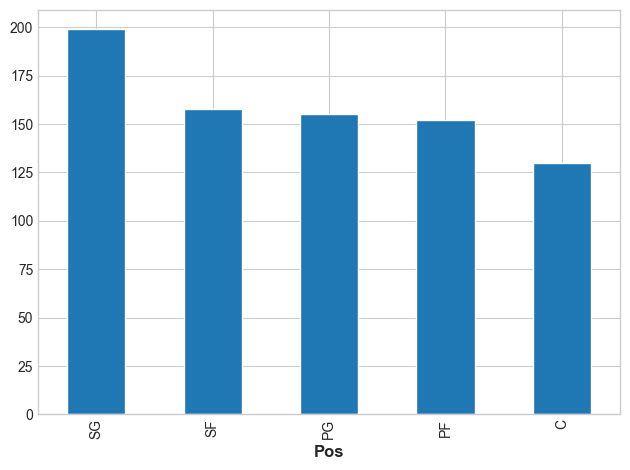

In [18]:
df = data
#Deleting combination of positions
df.drop(df[(df['Pos'] == 'SG-SF') | (df['Pos'] == 'SF-SG') | (df['Pos'] == 'SG-PG') | (df['Pos'] == 'C-PF') | (df['Pos'] == 'PF-SF') | (df['Pos'] == 'PG-SG')].index, inplace=True)
df.Pos.value_counts().plot(kind='bar')

In [19]:
df.groupby('Pos').size()

Pos
C     130
PF    152
PG    155
SF    158
SG    199
dtype: int64

In [20]:
def basket_position(pos):
    pos = pos.Pos
    if pos == 'PG':
        return 'Away'
    elif pos == 'SG':
        return 'Away'
    elif pos == 'SF':
        return 'Away'
    else:
        return 'Close'

df["Proximity"] = df.apply(basket_position, axis=1)
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Proximity
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,6.1,0.468,0.486,1.1,1.8,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,Close
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,5.0,0.548,0.547,1.4,2.6,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,Close
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,12.9,0.562,0.557,4.6,6.1,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,Close
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,2.6,0.560,0.424,0.6,1.0,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,Close
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1,8.8,0.578,0.566,1.9,2.2,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,Close
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,0.465,0.7,1.7,0.395,1.9,3.9,0.495,0.524,0.5,1.0,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,Close
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.460,3.1,8.0,0.382,6.3,12.3,0.512,0.536,6.6,7.3,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,Away
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,0.526,0.0,0.2,0.091,2.3,4.2,0.547,0.528,0.7,1.1,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,Close
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,0.567,0.0,0.1,0.000,1.9,3.2,0.593,0.567,1.4,1.8,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,Close


In [21]:
print("After sampling distribution:")
print(f"    'Position 1' == PG -> {round(len(df.loc[df['Pos'] == 'PG']) * 100 / len(df), 2)}%")
print(f"    'Position 2' == SG -> {round(len(df.loc[df['Pos'] == 'SG']) * 100 / len(df), 2)}%")
print(f"    'Position 3' == SF -> {round(len(df.loc[df['Pos'] == 'SF']) * 100 / len(df), 2)}%")
print(f"    'Position 4' == PF -> {round(len(df.loc[df['Pos'] == 'PF']) * 100 / len(df), 2)}%")
print(f"    'Position 5' == C -> {round(len(df.loc[df['Pos'] == 'C']) * 100 / len(df), 2)}%")

After sampling distribution:
    'Position 1' == PG -> 19.52%
    'Position 2' == SG -> 25.06%
    'Position 3' == SF -> 19.9%
    'Position 4' == PF -> 19.14%
    'Position 5' == C -> 16.37%


In [22]:
#Deleting Ranking and Player columns
df.drop(['Rk','Player','Pos'], axis=1, inplace=True)
df

,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Proximity
0,22,TOR,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,6.1,0.468,0.486,1.1,1.8,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,Close
1,28,MEM,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,5.0,0.548,0.547,1.4,2.6,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,Close
2,24,MIA,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,12.9,0.562,0.557,4.6,6.1,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,Close
3,21,MEM,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,2.6,0.560,0.424,0.6,1.0,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,Close
4,36,BRK,47,12,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1,8.8,0.578,0.566,1.9,2.2,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,Close
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,33,TOR,26,0,18.3,2.6,5.5,0.465,0.7,1.7,0.395,1.9,3.9,0.495,0.524,0.5,1.0,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,Close
808,23,ATL,76,76,34.9,9.4,20.3,0.460,3.1,8.0,0.382,6.3,12.3,0.512,0.536,6.6,7.3,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,Away
809,23,MIA,56,12,12.6,2.3,4.4,0.526,0.0,0.2,0.091,2.3,4.2,0.547,0.528,0.7,1.1,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,Close
810,29,POR,27,0,13.1,1.9,3.3,0.567,0.0,0.1,0.000,1.9,3.2,0.593,0.567,1.4,1.8,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,Close


In [23]:
#Watch out for duplicated
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Proximity


### Univariate analysis depending on label

In [24]:
groupby_proximity = df.groupby('Proximity')
groupby_proximity.describe()

Age                                                   G                                                   GS                                                 MP                                                    FG                                              FGA                                               FG%                                                  3P                                           3PA                                              3P%                                                2P                                             2PA                                              2P%                                                eFG%                                                  FT                                             FTA                                            FT%                                                 ORB                                           DRB                                            TRB                                              AST                                              STL                                          BLK                                             TOV                                              PF                                           PTS                                             
           count    mean    std   min   25%   50%   75%   max  count    mean     std  min   25%   50%    75%   max  count    mean     std  min  25%  50%    75%   max  count    mean    std  min   25%    50%     75%   max  count   mean    std  min  25%  50%    75%   max  count   mean    std  min  25%   50%    75%   max  count   mean    std  min    25%    50%    75%  max  count   mean    std  min  25%  50%  75%  max  count   mean    std  min  25%  50%    75%   max  count   mean    std  min   25%   50%    75%  max  count   mean    std  min    25%  50%  75%  max  count   mean    std  min  25%  50%    75%   max  count   mean    std  min    25%    50%    75%  max  count   mean    std  min    25%    50%    75%  max  count   mean    std  min  25%  50%    75%  max  count   mean    std  min  25%  50%  75%   max  count   mean    std  min    25%    50%    75%  max  count   mean    std  min  25%  50%  75%  max  count   mean    std  min  25%  50%  75%   max  count   mean    std  min  25%  50%    75%   max  count   mean    std  min  25%  50%    75%   max  count   mean   std  min  25%  50%  75%  max  count   mean    std  min    25%  50%  75%  max  count   mean    std  min    25%  50%  75%  max  count   mean    std  min  25%  50%  75%  max  count   mean    std  min    25%  50%     75%   max
Proximity                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
Away       512.0  25.865  3.973  19.0  23.0  25.0  28.0  40.0  512.0  35.096  26.267  1.0   9.0  34.0  60.00  82.0  512.0  15.287  

Boxplots separated by Proximity


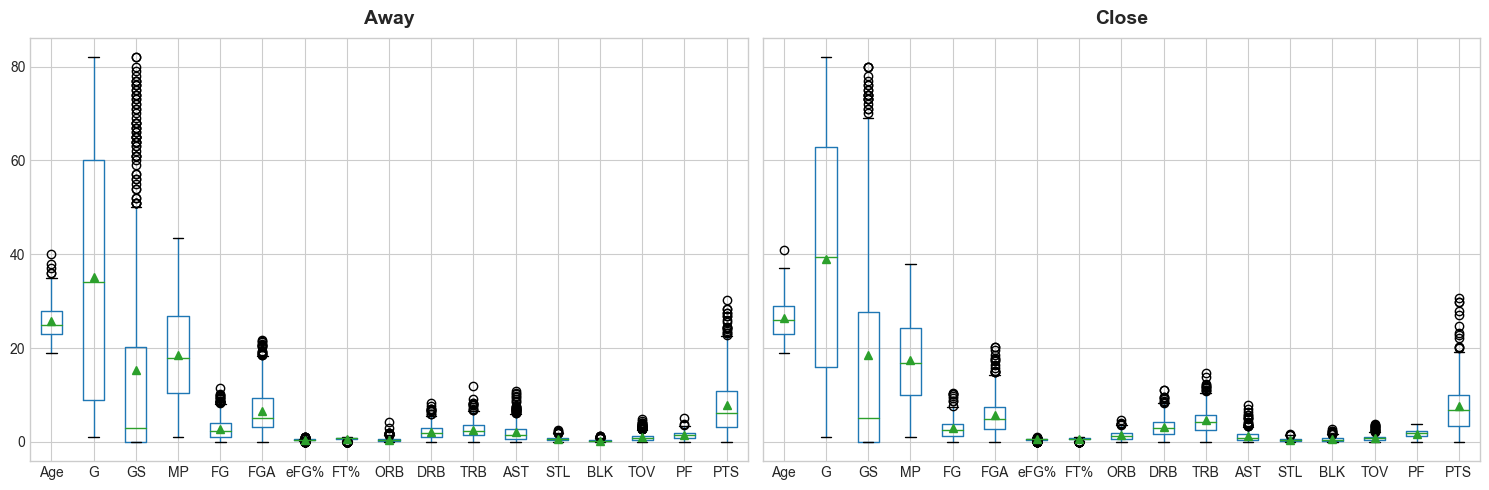

In [25]:
groupby_proximity.boxplot(column=['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'eFG%', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS' ],meanline=False,showmeans=True,return_type='dict', figsize=(15,5))
print('Boxplots separated by Proximity')

### Boxplots

Boxplots


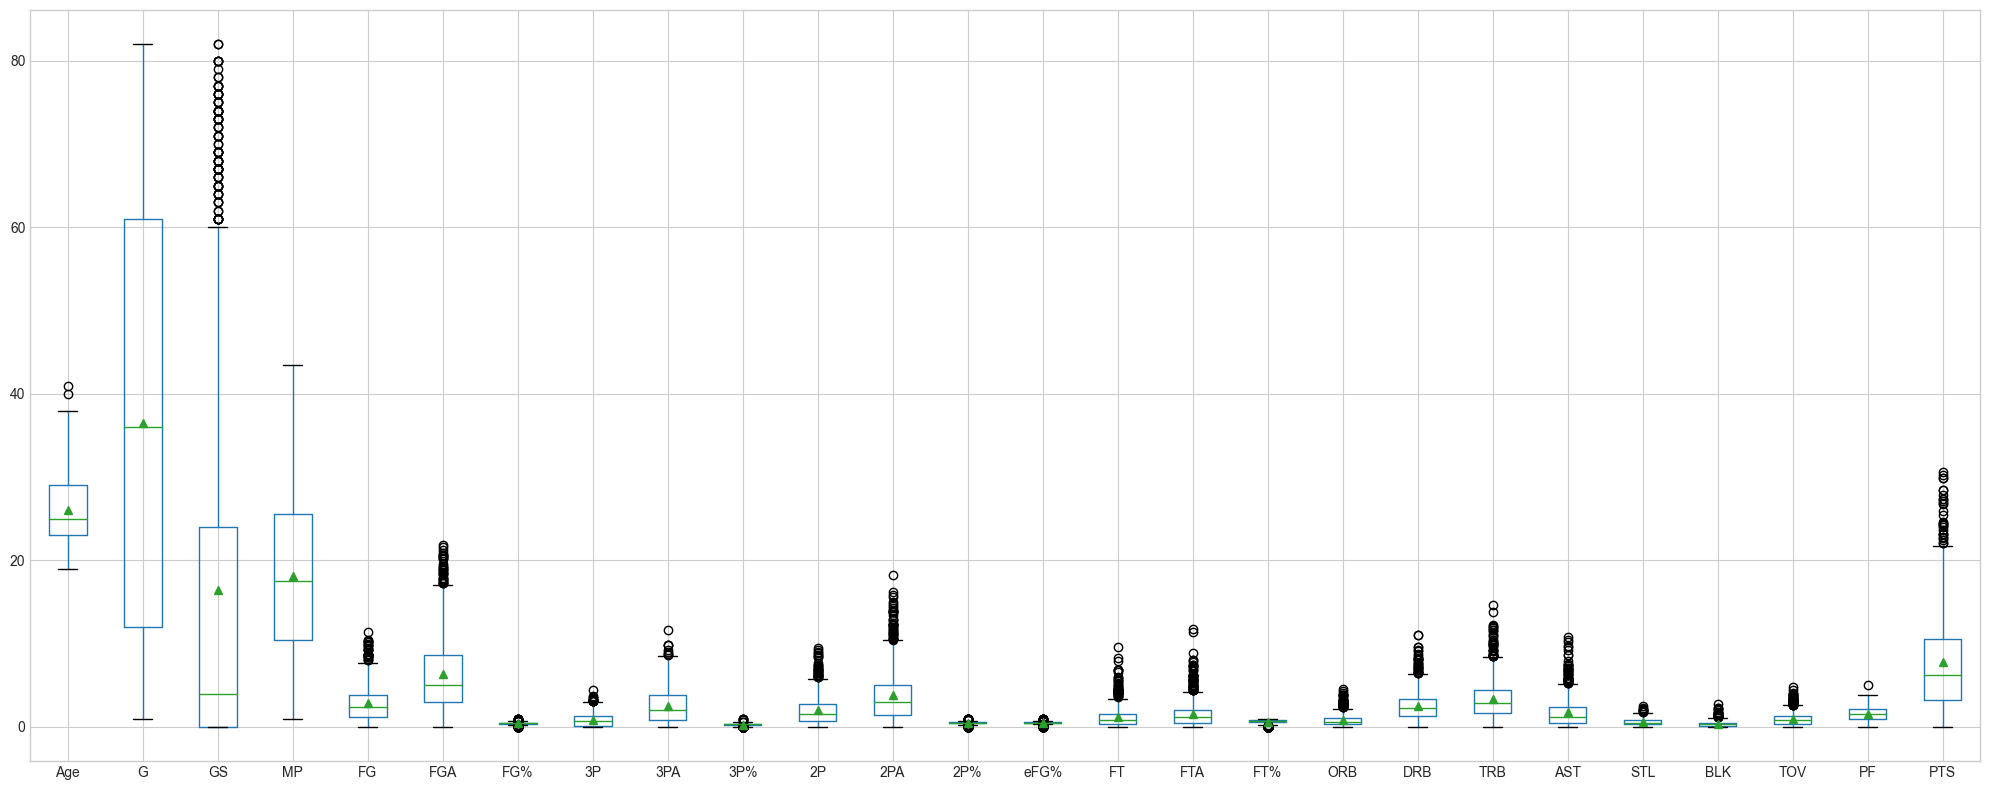

In [24]:
data.boxplot(column=['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS' ],meanline=False,showmeans=True,return_type='dict', figsize=(20,8))
print("Boxplots")

### Histograms of numerical variables

Histograms


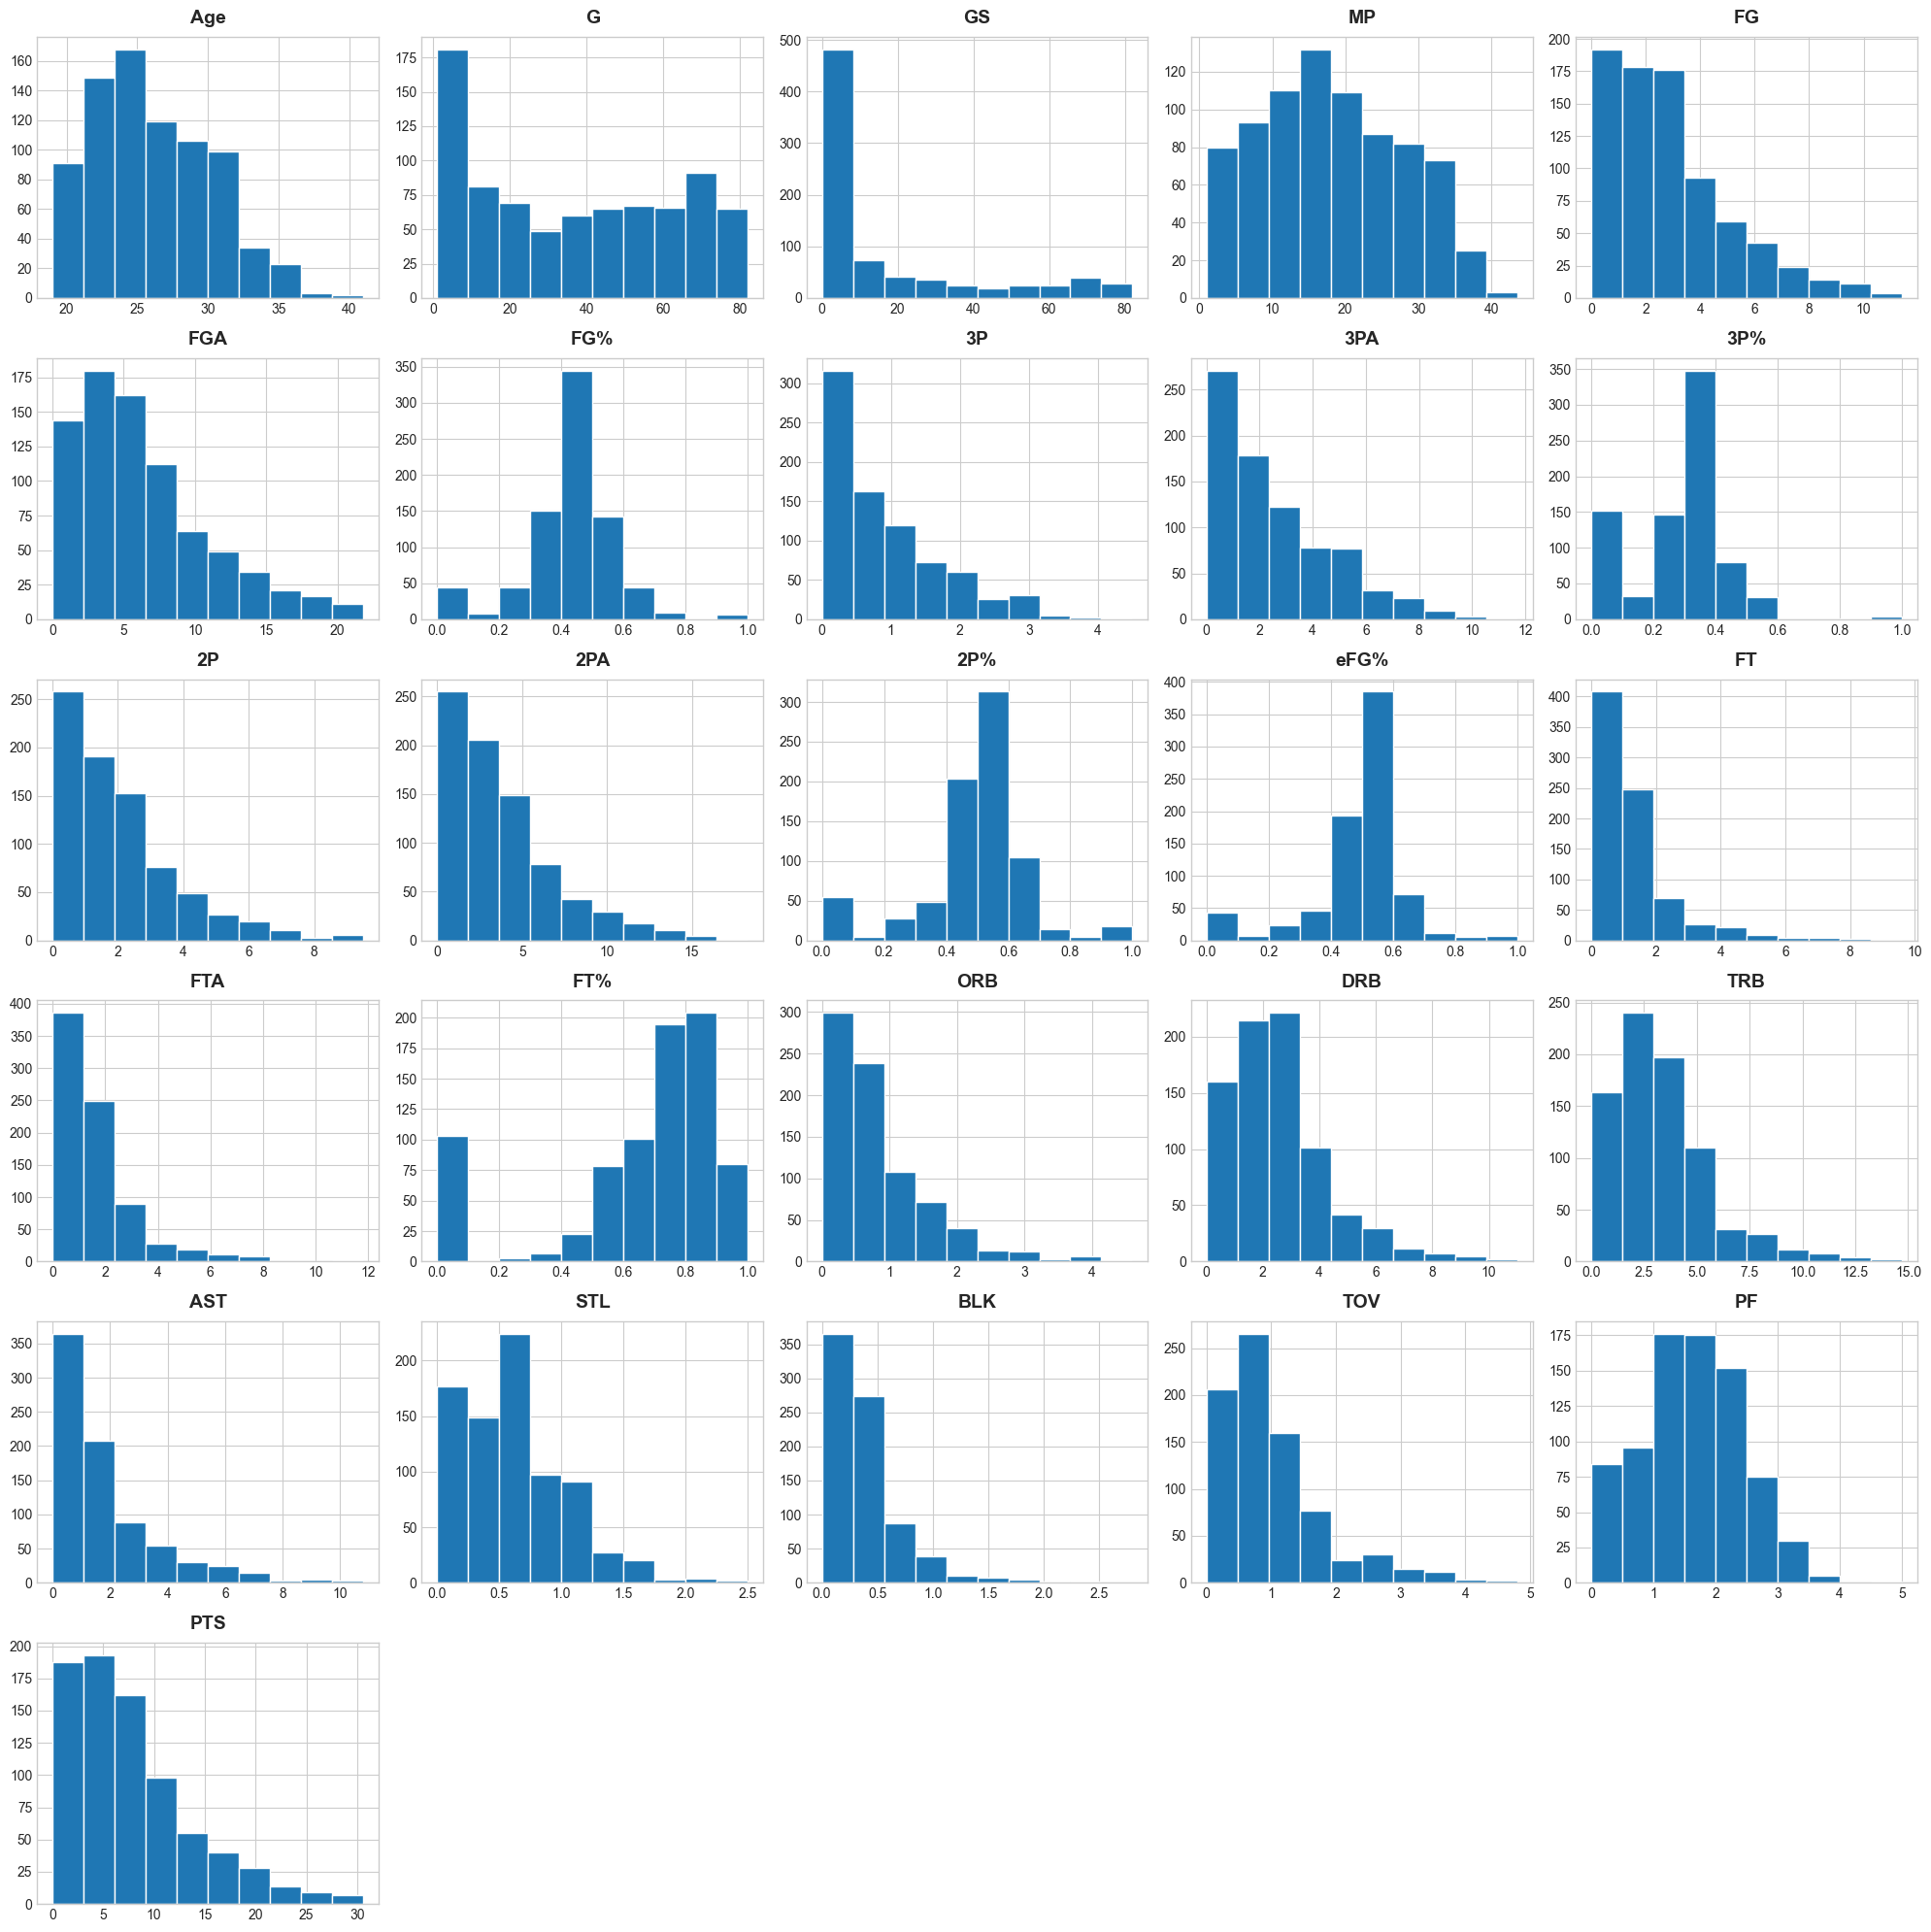

In [25]:
data.hist(column=['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS' ],  bins=10, figsize=[20,20])
print("Histograms")

### Bi-variate analysis

Scatter matrixes for correlations betwen numerical variables 


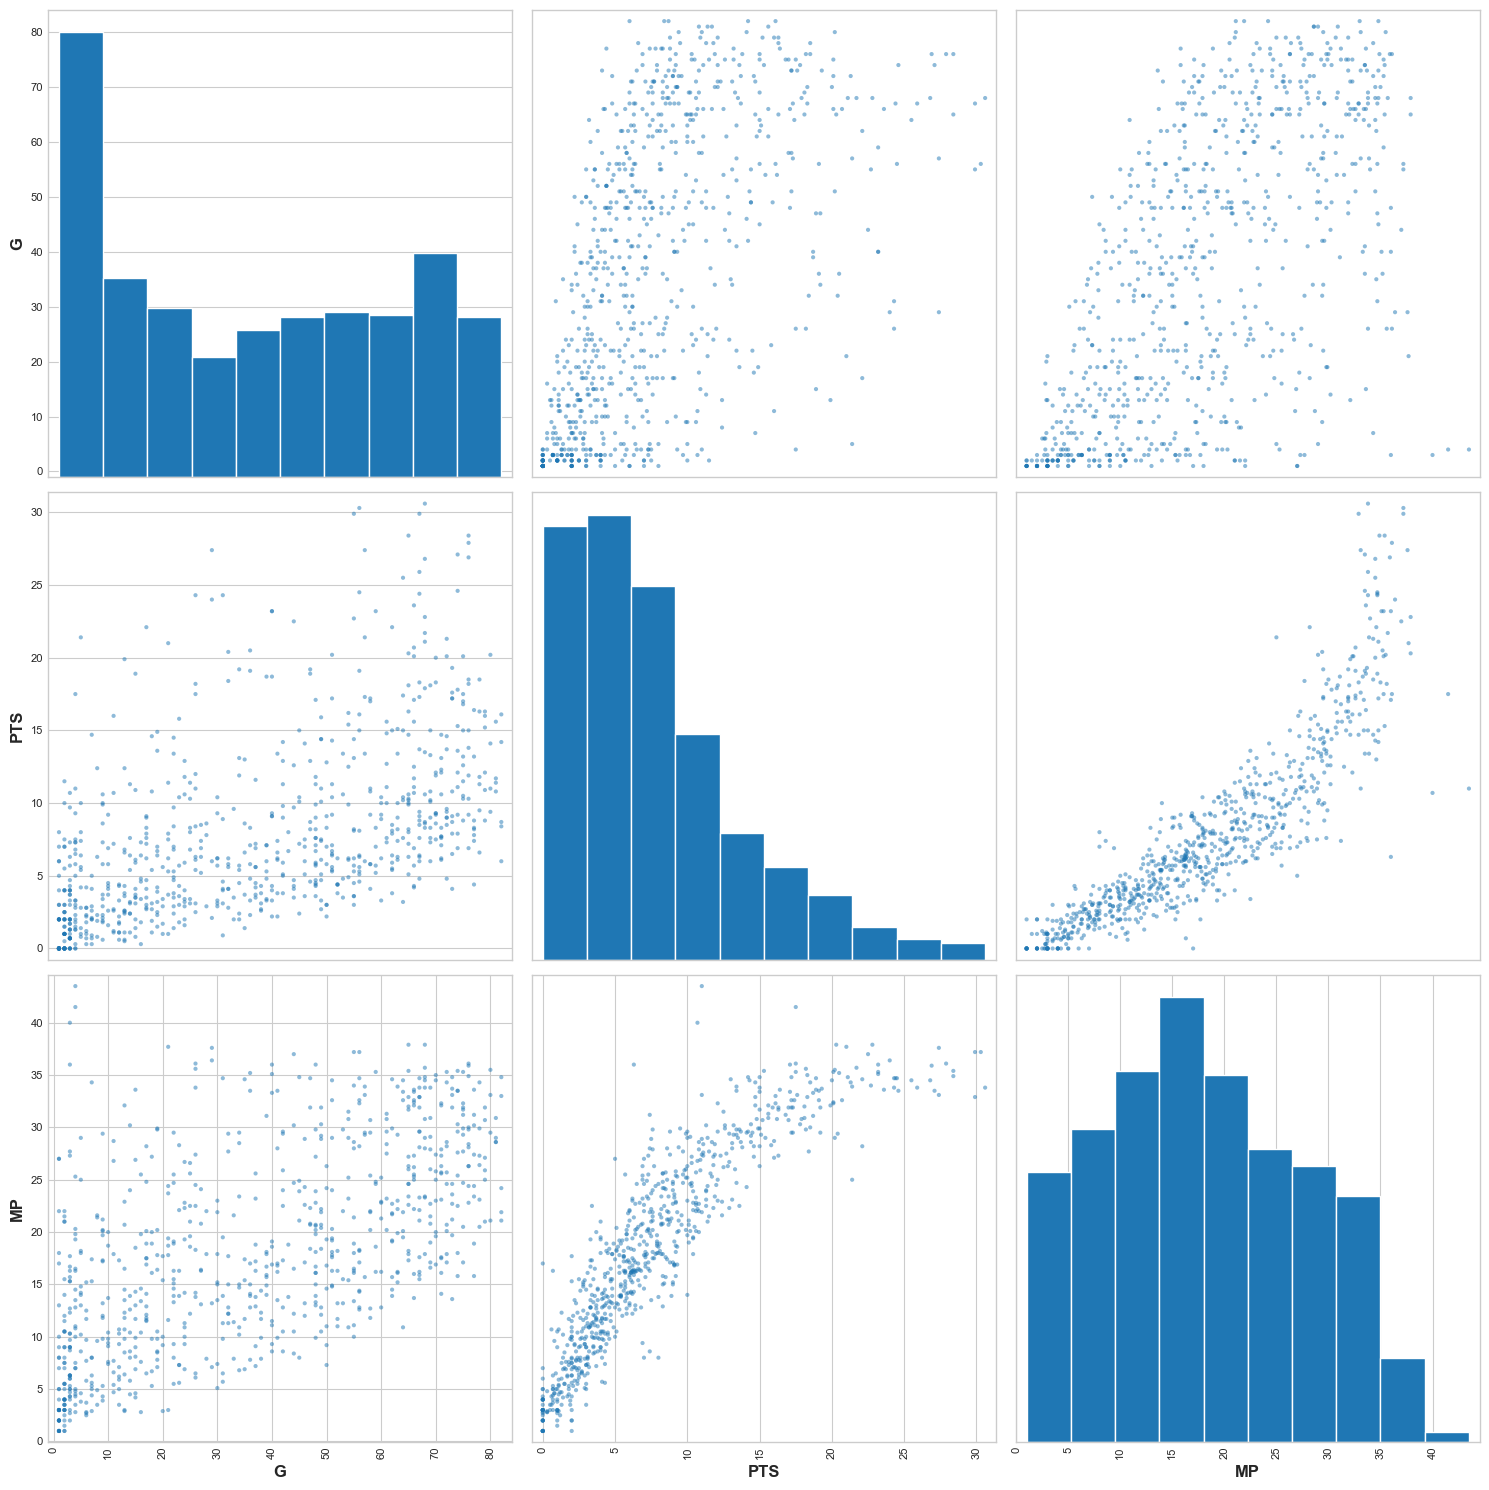

In [26]:
plotting.scatter_matrix(data[['G', 'PTS', 'MP']], figsize=(15,15))
print('Scatter matrixes for correlations betwen numerical variables ')

### Label Encoding

In [26]:
df_prox = df
df_prox.groupby('Proximity').size() / len(df)

Proximity
Away     0.645
Close    0.355
dtype: float64

In [27]:
prox = df_prox['Proximity']

X = df_prox
# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

y = X['Proximity']
X = X.drop('Proximity', axis=1)
# list discrete features that have integer dtypes for using MI (Mutual Information)
discrete_features = X.dtypes == int
#X["Proximity"] = y
#X.to_csv("data/complete_data1.csv", index=False)
X

,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,22,0,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,6.1,0.468,0.486,1.1,1.8,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,28,1,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,5.0,0.548,0.547,1.4,2.6,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,24,2,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,12.9,0.562,0.557,4.6,6.1,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,21,1,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,2.6,0.560,0.424,0.6,1.0,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,36,3,47,12,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1,8.8,0.578,0.566,1.9,2.2,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,33,0,26,0,18.3,2.6,5.5,0.465,0.7,1.7,0.395,1.9,3.9,0.495,0.524,0.5,1.0,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,23,20,76,76,34.9,9.4,20.3,0.460,3.1,8.0,0.382,6.3,12.3,0.512,0.536,6.6,7.3,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,23,2,56,12,12.6,2.3,4.4,0.526,0.0,0.2,0.091,2.3,4.2,0.547,0.528,0.7,1.1,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,29,29,27,0,13.1,1.9,3.3,0.567,0.0,0.1,0.000,1.9,3.2,0.593,0.567,1.4,1.8,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


### Features selection

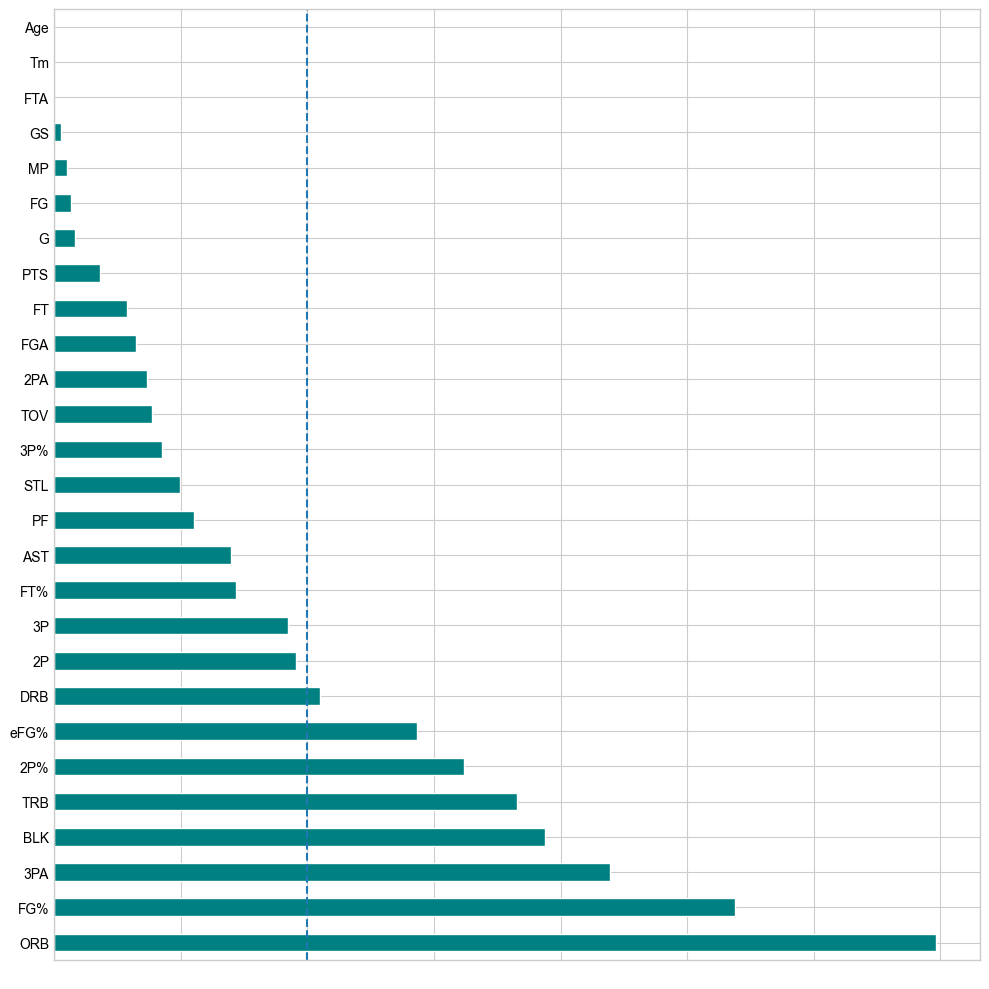

In [38]:
def scoring(X, y, discrete_features):
    score = mutual_info_classif(X, y, discrete_features=discrete_features)
    score = pandas.Series(score, name="Scores", index=X.columns)
    score = score.sort_values(ascending=False)
    return score

igThreshold = 0.05
scores = scoring(X, y, discrete_features)
scores.plot(kind = 'barh', color = 'teal', figsize=(10, 10))
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['xtick.color'] = 'white'
plt.axvline(x=igThreshold, linestyle='--')
plt.savefig("feature_selection.jpg")

In [39]:
def drop_uninformative(df, scores):
    return df.loc[:, scores > 0.05]

X = drop_uninformative(X, scores)
X

,FG%,3PA,2P%,eFG%,ORB,DRB,TRB,BLK
0,0.439,2.1,0.468,0.486,2.0,4.5,6.5,0.6
1,0.547,0.0,0.548,0.547,4.6,5.4,10.0,0.8
2,0.557,0.1,0.562,0.557,2.4,7.6,10.1,0.8
3,0.402,1.5,0.560,0.424,1.0,1.7,2.7,0.3
4,0.550,1.0,0.578,0.566,1.6,3.9,5.5,1.0
...,...,...,...,...,...,...,...,...
807,0.465,1.7,0.495,0.524,1.5,2.9,4.4,0.4
808,0.460,8.0,0.512,0.536,0.7,3.1,3.7,0.1
809,0.526,0.2,0.547,0.528,1.5,3.7,5.3,0.4
810,0.567,0.1,0.593,0.567,1.9,2.8,4.6,0.2


In [40]:
X["Proximity"] = y
X.to_csv("data/final_data.csv", index=False)
X

C:\Users\migue\AppData\Local\Temp\ipykernel_15828\4248668186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Proximity"] = y


,FG%,3PA,2P%,eFG%,ORB,DRB,TRB,BLK,Proximity
0,0.439,2.1,0.468,0.486,2.0,4.5,6.5,0.6,0
1,0.547,0.0,0.548,0.547,4.6,5.4,10.0,0.8,0
2,0.557,0.1,0.562,0.557,2.4,7.6,10.1,0.8,0
3,0.402,1.5,0.560,0.424,1.0,1.7,2.7,0.3,0
4,0.550,1.0,0.578,0.566,1.6,3.9,5.5,1.0,0
...,...,...,...,...,...,...,...,...,...
807,0.465,1.7,0.495,0.524,1.5,2.9,4.4,0.4,0
808,0.460,8.0,0.512,0.536,0.7,3.1,3.7,0.1,1
809,0.526,0.2,0.547,0.528,1.5,3.7,5.3,0.4,0
810,0.567,0.1,0.593,0.567,1.9,2.8,4.6,0.2,0


### Balancing dataset

In [23]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import pandas as pd
under_sampler = RandomUnderSampler(random_state=1234)

X = pd.read_csv("models/final_data.csv")
y = X['Proximity']


XtrainEbal, ybal = under_sampler.fit_resample(X, y)

print('-------- Before balancing -> ' + str(len(y)) + ' rows in total')
print(f"    'Proximity' == 0 -> {round(len(y.loc[X['Proximity'] == 0]) * 100 / len(y), 2)}%")
print(f"    'Proximity' == 1 -> {round(len(y.loc[X['Proximity'] == 1]) * 100 / len(y), 2)}%")

print('-------- After balancing -> ' + str(len(ybal)) + ' rows in total')
print(f"    'Proximity' == 0 -> {round(len(ybal.loc[XtrainEbal['Proximity'] == 0]) * 100 / len(ybal), 2)}%")
print(f"    'Proximity' == 1 -> {round(len(ybal.loc[XtrainEbal['Proximity'] == 1]) * 100 / len(ybal), 2)}%")

XtrainEbal.to_csv("data/final_data_balanced.csv", index=False)


-------- Before balancing -> 794 rows in total
    'Proximity' == 0 -> 35.52%
    'Proximity' == 1 -> 64.48%
-------- After balancing -> 564 rows in total
    'Proximity' == 0 -> 50.0%
    'Proximity' == 1 -> 50.0%


### Normalizing balanced dataset

In [25]:
from sklearn.preprocessing import  StandardScaler
url = "data/final_data_balanced.csv"
dat = pd.read_csv(url)
scaler = StandardScaler()
num_d = [x for x in dat.columns if x != "Proximity"]
# update the cols with their normalized values
dat[num_d] = scaler.fit_transform(dat[num_d])
dat.to_csv("data/final_data_balanced_norm.csv", index=False)

### Looking up for the delimitation of the features selection

In [28]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import sklearn.neighbors as nb

# Select k best features following a given measure. Fit that on whole data set and return only relevant columns
X_reduced = SelectKBest(mutual_info_classif, k=2).fit_transform(X, y)
params = {'n_neighbors':list(range(1,20,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
# Let's do now the 10-fold cross-validation again
cv = StratifiedKFold(n_splits=10)
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed
clf.fit(X, y)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 17, 'weights': 'distance'} Accuracy= 0.6876898734177216


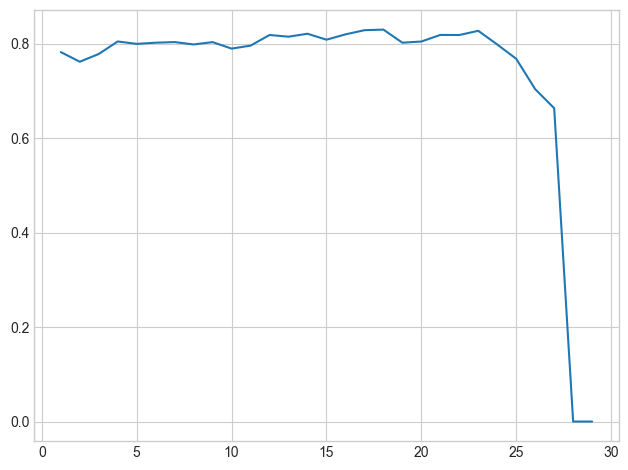

In [29]:
original = np.zeros(29)
for i in range(27):
    X_reduced = SelectKBest(mutual_info_classif, k=i+1).fit_transform(X, y)
    cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_reduced,y=y, cv=cv, scoring='accuracy')
    original[i]=np.mean(cv_scores)

original
plt.plot(range(1,30),original)
plt.show()

### Normalitzation

In [4]:
url = "models/final_data.csv"
dat = pd.read_csv(url)
scaler = StandardScaler()
num_d = [x for x in dat.columns if x != "Proximity"]
# update the cols with their normalized values
dat[num_d] = scaler.fit_transform(dat[num_d])
dat

,FG%,3PA,2P%,eFG%,ORB,DRB,TRB,BLK,Proximity
0,0.085,-0.198,-0.108,-0.011,1.590,1.121,1.358,0.682,0
1,0.806,-1.148,0.332,0.377,5.080,1.627,2.852,1.234,0
2,0.873,-1.103,0.409,0.441,2.127,2.863,2.895,1.234,0
3,-0.162,-0.470,0.398,-0.405,0.247,-0.453,-0.265,-0.147,0
4,0.827,-0.696,0.497,0.498,1.053,0.784,0.931,1.787,0
...,...,...,...,...,...,...,...,...,...
789,0.259,-0.379,0.040,0.231,0.918,0.222,0.461,0.129,0
790,0.226,2.472,0.134,0.307,-0.156,0.334,0.162,-0.700,1
791,0.666,-1.058,0.326,0.256,0.918,0.671,0.845,0.129,0
792,0.940,-1.103,0.579,0.504,1.455,0.166,0.547,-0.423,0


In [5]:
dat.to_csv("models/final_data_norm.csv", index=False)